In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import json
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
matplotlib.rcParams["figure.figsize"] =(20,10)


Bad key "text.kerning_factor" on line 4 in
C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("Data/Melbourne_housing_FULL.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.shape

(34857, 21)

In [4]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [5]:
df = df.replace(-np.inf, np.nan).dropna()
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [6]:
df.groupby('Type')['Type'].agg('count')

Type
h    6625
t     722
u    1540
Name: Type, dtype: int64

In [7]:
df.Rooms.unique()

array([ 2,  3,  4,  1,  6,  5,  8,  7, 10, 12], dtype=int64)

In [8]:
#removing columns which is not required
df = df.drop(['Address', 'Method','SellerG','CouncilArea','Propertycount','Bedroom2','YearBuilt','Postcode','Date'], axis=1)
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname
2,Abbotsford,2,h,1035000.0,2.5,1.0,0.0,156.0,79.0,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,2.5,2.0,0.0,134.0,150.0,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,2.5,1.0,2.0,120.0,142.0,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,3,h,1876000.0,2.5,2.0,0.0,245.0,210.0,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,2,h,1636000.0,2.5,1.0,2.0,256.0,107.0,-37.8060,144.9954,Northern Metropolitan


In [9]:
#convert float cloumn to int
df.Bathroom = df.Bathroom.astype(int)
df.Car = df.Car.astype(int)
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname
2,Abbotsford,2,h,1035000.0,2.5,1,0,156.0,79.0,-37.8079,144.9934,Northern Metropolitan
4,Abbotsford,3,h,1465000.0,2.5,2,0,134.0,150.0,-37.8093,144.9944,Northern Metropolitan
6,Abbotsford,4,h,1600000.0,2.5,1,2,120.0,142.0,-37.8072,144.9941,Northern Metropolitan
11,Abbotsford,3,h,1876000.0,2.5,2,0,245.0,210.0,-37.8024,144.9993,Northern Metropolitan
14,Abbotsford,2,h,1636000.0,2.5,1,2,256.0,107.0,-37.8060,144.9954,Northern Metropolitan


In [10]:
df.Suburb = df.Suburb.apply(lambda x: x.strip())
suburb_stats = df.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False)
suburb_stats_less_than_10 = suburb_stats[suburb_stats <= 10]
df.Suburb = df.Suburb.apply(lambda x: 'Other' if x in suburb_stats_less_than_10 else x)

In [11]:
#remove the rows where landsize is 0
clean_df =df[(df['Landsize'] > 0.0) & (df['BuildingArea'] > 0.0)]
clean_df.shape

(7827, 12)

In [12]:
#remove the rows where landsize is less than building area. Ideally Landsize is in sqft and building area should be calculated based on landsize
reduce_df = clean_df[clean_df['Landsize'] > clean_df['BuildingArea']]
#remove the rows where landsize < 50
reduce_df =reduce_df[reduce_df.Landsize > 50]
reduce_df.shape

(7518, 12)

In [13]:
reduce_df['Price_per_sqm'] = reduce_df['Price']/reduce_df['Landsize']
reduce_df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Regionname,Price_per_sqm
2,Abbotsford,2,h,1035000.0,2.5,1,0,156.0,79.0,-37.8079,144.9934,Northern Metropolitan,6634.615385
11,Abbotsford,3,h,1876000.0,2.5,2,0,245.0,210.0,-37.8024,144.9993,Northern Metropolitan,7657.142857
14,Abbotsford,2,h,1636000.0,2.5,1,2,256.0,107.0,-37.8060,144.9954,Northern Metropolitan,6390.625000
18,Abbotsford,2,h,1097000.0,2.5,1,2,220.0,75.0,-37.8010,144.9989,Northern Metropolitan,4986.363636
24,Abbotsford,3,h,1350000.0,2.5,2,2,214.0,190.0,-37.8085,144.9964,Northern Metropolitan,6308.411215


In [14]:
reduce_df.shape

(7518, 13)

In [15]:
#remove outliers
dff=reduce_df[~(reduce_df.Price_per_sqm/reduce_df.Rooms < 30)]
dff.shape

(7504, 13)

In [16]:
dff.Price_per_sqm.describe()

count     7504.000000
mean      2791.301469
std       2121.449896
min         41.955491
25%       1300.215517
50%       2194.201739
75%       3653.025691
max      20476.190476
Name: Price_per_sqm, dtype: float64

In [17]:
# Remove outliners
def remove_price_outlier(df):
    output= pd.DataFrame()
    for key , subdf in df.groupby('Suburb'):
        m= np.mean(subdf.Price_per_sqm)
        st = np.std(subdf.Price_per_sqm)
        new_df = subdf[(subdf.Price_per_sqm > (m-st)) & (subdf.Price_per_sqm <= (m+st))]
        output = pd.concat([output,new_df], ignore_index = True)
    return output

In [18]:
ndf=remove_price_outlier(dff)
ndf.shape

(5692, 13)

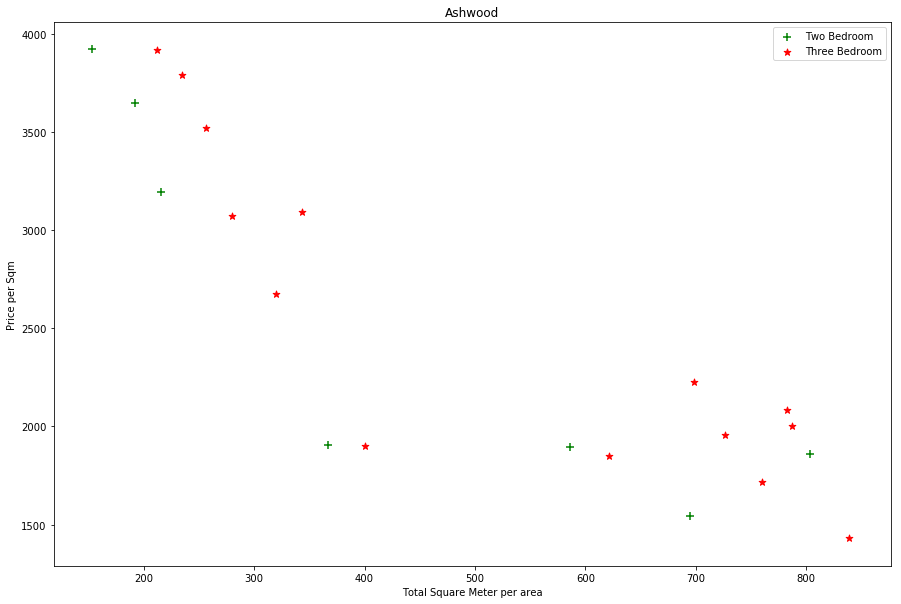

In [19]:
def plot_scatter_chart(df,suburb):
    #b1=df[(df.Suburb == suburb) & (df.Rooms==1)]
    b2=df[(df.Suburb == suburb) & (df.Rooms==2)]
    b3=df[(df.Suburb == suburb) & (df.Rooms==3)]
    #b4=df[(df.Suburb == suburb) & (df.Rooms==4)]
    #b5=df[(df.Suburb == suburb) & (df.Rooms==5)]
    matplotlib.rcParams['figure.figsize'] =(15,10)
    #plt.scatter(b1.Landsize,b1.Price_per_sqm ,color='blue',label='One Bedroom', s=50)
    plt.scatter(b2.Landsize,b2.Price_per_sqm, marker='+', color='green', label='Two Bedroom', s= 50)
    plt.scatter(b3.Landsize,b3.Price_per_sqm, marker ='*', color='red', label='Three Bedroom', s= 50)
    #plt.scatter(b4.Landsize,b4.Price_per_sqm, marker ='^', color='orange', label='Four Bedroom', s= 50)
    #plt.scatter(b5.Landsize,b5.Price_per_sqm, color='pink', label='Five Bedroom', s= 50)
    plt.xlabel("Total Square Meter per area")
    plt.ylabel("Price per Sqm")
    plt.title(suburb)
    plt.legend()

plot_scatter_chart(ndf,'Ashwood')

In [20]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for suburb, suburb_df in df.groupby('Suburb'):
        room_stats = {}
        for rooms, rooms_df in suburb_df.groupby('Rooms'):
            room_stats[rooms] = {
                'mean' : np.mean(rooms_df.Price_per_sqm),
                'std': np.std(rooms_df.Price_per_sqm),
                'count': rooms_df.shape[0]
            }
        for rooms, rooms_df in suburb_df.groupby('Rooms'):
            stats = room_stats.get(rooms-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices,rooms_df[rooms_df.Price_per_sqm<(stats['mean'])].index.values)
        return df.drop(exclude_indices,axis='index')

data = remove_bedroom_outliers(ndf)
data.shape

(5689, 13)

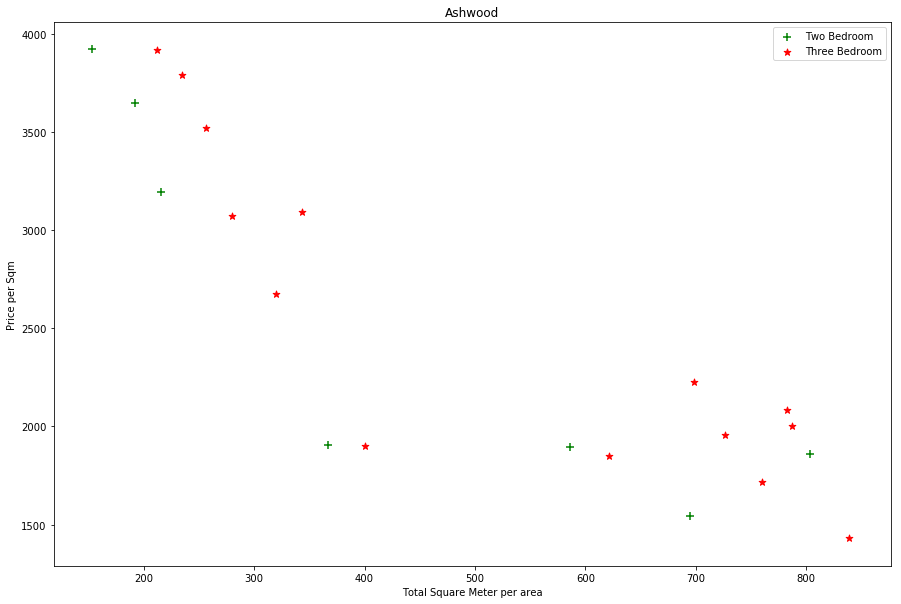

In [21]:
plot_scatter_chart(data,'Ashwood')

Text(0, 0.5, 'Count')

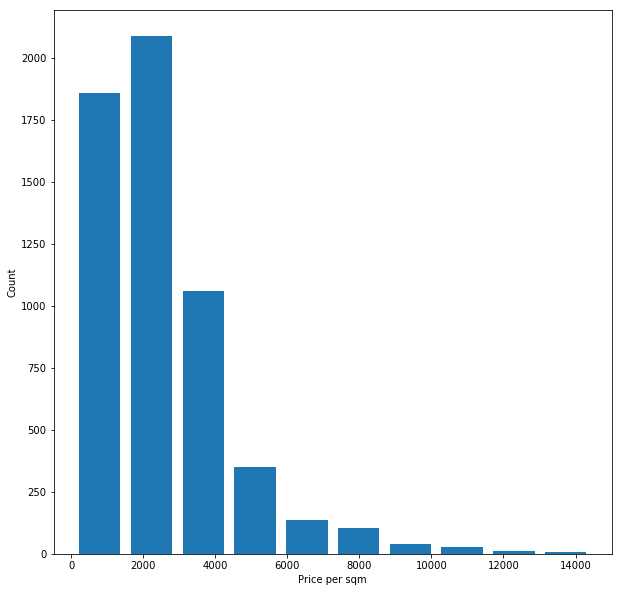

In [22]:
matplotlib.rcParams["figure.figsize"] =(10,10)
plt.hist(data.Price_per_sqm,rwidth=0.8)
plt.xlabel("Price per sqm")
plt.ylabel("Count")

In [23]:
#no need to remove bathroom as data looks more appropriate
ddf = data.drop(['Price_per_sqm','Lattitude','Longtitude','Regionname','Type','BuildingArea'],axis='columns')
dummy_data = pd.get_dummies(ddf.Suburb)
dummy_data.head()

,Abbotsford,Aberfeldie,Airport West,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,Armadale,...,Werribee,West Footscray,West Melbourne,Westmeadows,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
final_df=pd.concat([ddf,dummy_data.drop('Other',axis='columns')],axis='columns')
final_df.head()

,Suburb,Rooms,Price,Distance,Bathroom,Car,Landsize,Abbotsford,Aberfeldie,Airport West,...,Werribee,West Footscray,West Melbourne,Westmeadows,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,Abbotsford,2,1035000.0,2.5,1,0,156.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsford,3,1876000.0,2.5,2,0,245.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,2,1636000.0,2.5,1,2,256.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsford,2,1097000.0,2.5,1,2,220.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,3,1350000.0,2.5,2,2,214.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
final_df=final_df.drop('Suburb',axis='columns')
final_df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Abbotsford,Aberfeldie,Airport West,Albert Park,...,Werribee,West Footscray,West Melbourne,Westmeadows,Williamstown,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,2,1035000.0,2.5,1,0,156.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1876000.0,2.5,2,0,245.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1636000.0,2.5,1,2,256.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1097000.0,2.5,1,2,220.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1350000.0,2.5,2,2,214.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
final_df.shape

(5689, 202)

In [27]:
X=final_df.drop('Price',axis='columns')
y=final_df.Price

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size =0.2)
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7561179146389955

In [29]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.75611791, 0.77037777, 0.76432058, 0.77041134, 0.76892935])

In [30]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [31]:
def find_best_model_using_gridsearchcv(X,y):
    algos={
        "linear Regression": {
            "model":LinearRegression(),
            "params":{
                'normalize':[True,False]
            }            
        },
        "lasso":{
            "model": Lasso(),
            "params":{
                'alpha':[1,2],
                'selection': ['random','cyclic']
            }            
        },
        'decision_tree':{
            "model": DecisionTreeRegressor(),
            "params":{
                'criterion':['mse','friendman_mse'],
                'splitter': ['best','random']
            }            
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [32]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\tree\_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'friendman_mse'

  FitFailedWarning)
C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these p

,model,best_score,best_params
0,linear Regression,0.766031,{'normalize': True}
1,lasso,0.766023,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.623479,"{'criterion': 'mse', 'splitter': 'random'}"


In [33]:
d_tree = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')

In [34]:
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [35]:
d_tree.score(X_test, y_test)

0.5569293967101178

In [36]:
final_df.columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'Abbotsford', 'Aberfeldie', 'Airport West', 'Albert Park',
       ...
       'Werribee', 'West Footscray', 'West Melbourne', 'Westmeadows',
       'Williamstown', 'Windsor', 'Wollert', 'Wyndham Vale', 'Yallambie',
       'Yarraville'],
      dtype='object', length=202)

In [37]:
X.columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Abbotsford',
       'Aberfeldie', 'Airport West', 'Albert Park', 'Albion',
       ...
       'Werribee', 'West Footscray', 'West Melbourne', 'Westmeadows',
       'Williamstown', 'Windsor', 'Wollert', 'Wyndham Vale', 'Yallambie',
       'Yarraville'],
      dtype='object', length=201)

In [38]:
np.where(X.columns=='Airport West')[0][0]

7

In [39]:
def predict_price(suburb,distance,sqm,bathroom,car,rooms):
    sub_index = np.where(X.columns==suburb)[0][0]
    
    x =np.zeros(len(X.columns))
    x[0]= rooms
    x[1]= distance
    x[2]= bathroom
    x[3]= car
    x[4]= sqm
    if sub_index >= 0:
        x[sub_index] = 1
    
    return d_tree.predict([x])[0]

In [40]:
predict_price('Doncaster',4,13.9,3,2,657)

840000.0

In [41]:
np.where(X.columns=='Ashwood')[0][0]

17

In [42]:
# row 690 in dataset and price is 1120000                                 
predict_price('Ashwood',3,12.2,1,2,723)

1670000.0

In [43]:
predict_price('Cremorne',2,2.5,1,1,115)

1620000.0

In [44]:
import pickle
with open('melb_house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [45]:
import json
columns ={
    'data columns' : [col.lower() for col in X.columns]
}
with open("column.json","w") as f:
    f.write(json.dumps(columns))

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

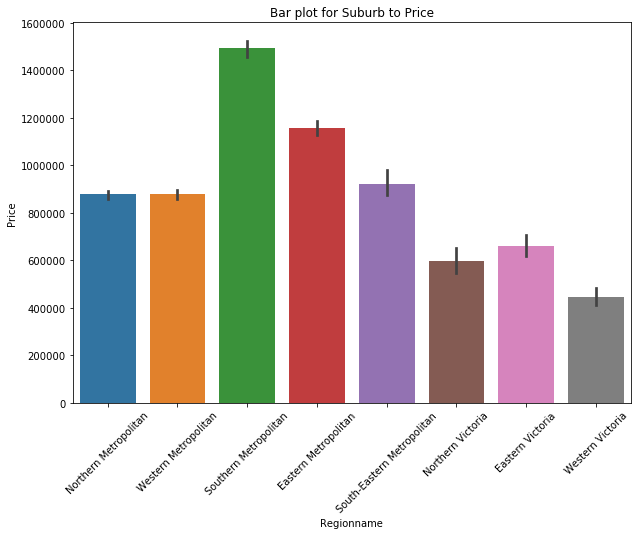

In [47]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.barplot(x=df['Regionname'], y=df['Price'])
plt.title("Bar plot for Suburb to Price")
plt.xticks(rotation=45)

C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Violin plot for Type to Price')

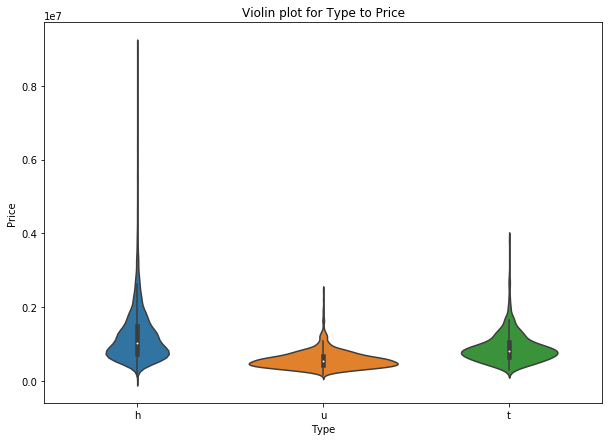

In [48]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.violinplot(df['Type'], df['Price'])
plt.title("Violin plot for Type to Price")

C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lattitude to Longitude for Type of room')

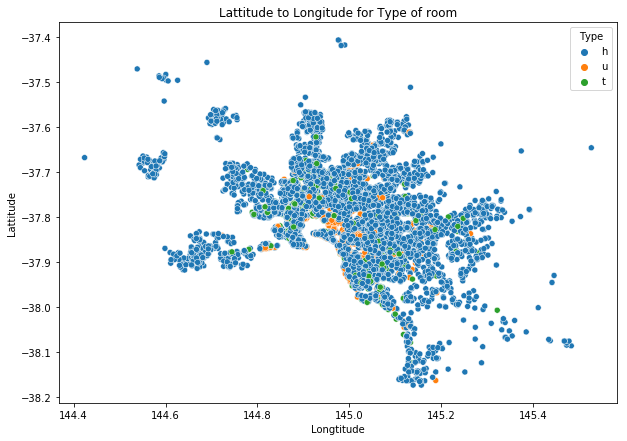

In [49]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(df["Longtitude"], df["Lattitude"], hue=df["Type"])
plt.title("Lattitude to Longitude for Type of room")

C:\Users\Purvi\anaconda3\envs\pyvizenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Lattitude to Longitude for Regionname')

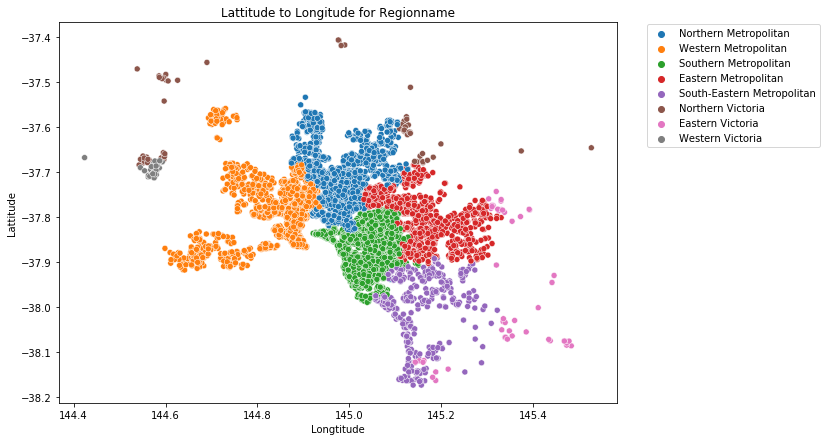

In [50]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(df["Longtitude"], df["Lattitude"], hue=df["Regionname"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Lattitude to Longitude for Regionname")

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Linear Regression R^2 Score: ", lr.score(X_train, y_train))
print("Linear Regression Test R^2 Score: ", lr.score(X_test, y_test))
y_pred = lr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(lr, X_test, y_test, cv=5))

Linear Regression R^2 Score:  0.774394181699009
Linear Regression Test R^2 Score:  0.7561179146389955
Mean Squared Error:  96084035036.54846
Mean Absolute Error:  206703.55286451144
Cross Validation Score:  [-1.27220508e+17 -2.15461640e+16 -8.54998963e+16 -6.89351618e+16
 -5.83400053e+18]


In [54]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=5, n_jobs=-1, random_state=12)
rfr.fit(X_train, y_train)
print("Random Forest R^2 Score: ", rfr.score(X_train, y_train))
print("Random Forest Test R^2 Score: ", rfr.score(X_test, y_test))
y_pred = rfr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(rfr, X_test, y_test, cv=5))

Random Forest R^2 Score:  0.6593409224771373
Random Forest Test R^2 Score:  0.5716507158191826
Mean Squared Error:  168759946300.2254
Mean Absolute Error:  294934.7646183426
Cross Validation Score:  [0.51734372 0.49192113 0.55693414 0.59713683 0.60485054]


In [55]:
gbr = GradientBoostingRegressor(n_estimators=1000, max_depth=5, random_state=22)
gbr.fit(X_train, y_train)
print("Gradient Boosting R^2 Score: ", gbr.score(X_train, y_train))
print("Gradient Boosting Test R^2 Score: ", gbr.score(X_test, y_test))
y_pred = gbr.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Cross Validation Score: ", cross_val_score(gbr, X_test, y_test, cv=5))

Gradient Boosting R^2 Score:  0.9739355108025985
Gradient Boosting Test R^2 Score:  0.7916379872787997
Mean Squared Error:  82089928421.57607
Mean Absolute Error:  175829.8804762895
Cross Validation Score:  [0.73022605 0.70322479 0.75091721 0.72003336 0.80456723]


In [56]:
knr = KNeighborsRegressor(weights='distance', n_neighbors=200)
knr.fit(X_train, y_train)
print("KNN Score: ", knr.score(X_train, y_train))
print("KNN Test Score: ", knr.score(X_test, y_test))

KNN Score:  0.9996742108998733
KNN Test Score:  0.2573397333648567
